# Exploratory Data Analysis (EDA) for Lending Club
## 1. Data Sourcing
    * Importing libraries
    * Reading the data into dataframe
    * printing the information and statistics

## 2. Data Cleaning
    * Checking and droping null values(missing values)
    * Imputing all missing value columns according to there datatype
    * Checking outlier using boxplot 
    * Removing outliers with Interquartile range

## 3. Data Derived Metics
    * Data Processing
    * Data Filtering
    * Droping irrelevant columns
    * Converting (object) columns into numeric

## 4. Univariate Analysis
    * Continuous Variable
    * Categorical Variable
    * Ploting word cloud and Live Frame ploting
    
## 5. Segmented Univariate Analysis
    * Continuous Variable
    * Categorical Variable

## 6. Bivariate Analysis
    * Continuous Variable
    * Categorical Variable

## 7. Multivariate Analysis
    * Correlation Matrics using heatmap

## 1. Data Sourcing

In [91]:
# connecting colab with google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# unzip the loan.zip file to colab content
!unzip  /content/drive/MyDrive/cs_risk_analytics/loan.zip

Archive:  /content/drive/MyDrive/cs_risk_analytics/loan.zip
  inflating: loan.csv                


* Importing libraries

In [1]:
import cv2
import pandas as pd
import numpy as np
from wordcloud import WordCloud, ImageColorGenerator
import seaborn as sns
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import Image
import datetime
import plotly.express as px

In [2]:
# Reading and loading the loan.csv file
df = pd.read_csv('/content/loan.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]


### Data understanding

In [4]:
# Size of dataset
df.shape

(39717, 111)

In [5]:
# statistics of dataset
df.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  ...  num_tl_90g_dpd_24m  \
count  39717.000000    39717.000000  ...                 0.0   
mean       0.146512        0.869200  ...                 NaN   
std        0.491812        1.070219  ...                 NaN   
min        0.000000        0.000000  ...                 NaN   
25%        0.000000        0.000000  ...                 NaN   
50%        0.000000        1.000000  ...                 NaN   
75%        0.000000        1.000000  ...                 NaN   
max       11.000000        8.000000  ...                 NaN   

       num_tl_op_past_12m  pct_tl_nvr_dlq  percent_bc_gt_75  \
count                 0.0             0.0               0.0   
mean                  NaN             NaN               NaN   
std                   NaN             NaN               NaN   
min                   NaN             NaN               NaN   
25%                   NaN             NaN               NaN   
50%                   NaN             NaN               NaN   
75%                   NaN             NaN               NaN   
max                   NaN             NaN               NaN   

       pub_rec_bankruptcies  tax_liens  tot_hi_cred_lim  total_bal_ex_mort  \
count          39020.000000    39678.0              0.0                0.0   
mean               0.043260        0.0              NaN                NaN   
std                0.204324        0.0              NaN                NaN   
min                0.000000        0.0              NaN                NaN   
25%                0.000000        0.0              NaN                NaN   
50%                0.000000        0.0              NaN                NaN   
75%                0.000000        0.0              NaN                NaN   
max                2.000000        0.0              NaN                NaN   

       total_bc_limit  total_il_high_credit_limit  
count             0.0                         0.0  
mean              NaN                         NaN  
std               NaN                         NaN  
min               NaN                         NaN  
25%               NaN                         NaN  
50%               NaN                         NaN  
75%               NaN                         NaN  
max               NaN                         NaN  

[8 rows x 87 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


## 2. Data Cleaning

#### Checking how many columns contains null values

* 54 out of 111 columns contains all null values. So its better approach to remove all null columns(features)

In [7]:
df.dropna(how='all', axis=1, inplace=True)  # ‘all’ : If all values are NA, drop that column.

In [8]:
df.dropna(how='all', axis = 0, inplace=True) # ‘all’ : If all values are NA, drop that rows.

In [9]:
df.shape

(39717, 57)

#### Dealing with missing(NAN) values

In [10]:
# if colums contains more than 40 % null valyes, then removin those columns
drop_col = df.columns[df.isna().sum() > df.shape[0] * .40].tolist()

In [11]:
df.drop(columns=drop_col, inplace=True)

In [12]:
# This columns contains missing values
df.columns[df.isna().any()].tolist()

['emp_title',
 'emp_length',
 'desc',
 'title',
 'revol_util',
 'last_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'chargeoff_within_12_mths',
 'pub_rec_bankruptcies',
 'tax_liens']

#### Imputing all missing value columns accoring to there datatype

In [13]:
df['emp_title'].fillna(df['emp_title'].mode()[0], inplace = True)

df['emp_length'].fillna(df['emp_length'].mode()[0], inplace = True)

df['desc'].fillna(df['desc'].mode()[0], inplace = True)

df['title'].fillna(df['title'].mode()[0], inplace = True)

df['revol_util'].fillna(df['revol_util'].mode()[0], inplace = True)

df['collections_12_mths_ex_med'].fillna(0.0, inplace = True)

df['chargeoff_within_12_mths'].fillna(0.0, inplace = True)

df['pub_rec_bankruptcies'].fillna(0.0, inplace = True)

df['tax_liens'].fillna(0.0, inplace = True)

#### Checking outlier in dataset and remove if posible

In [14]:
fig = px.box(df, y="total_acc")
fig.update_layout(autosize=False, width=400, height=400)
fig.show()

fig = px.box(df, y="loan_amnt")
fig.update_layout(autosize=False, width=400, height=400)
fig.show()

fig = px.box(df, y="annual_inc")
fig.update_layout(autosize=False, width=400, height=400)
fig.show()

fig = px.box(df, y="open_acc")
fig.update_layout(autosize=False, width=400, height=400)
fig.show()

In [15]:
annual_inc_q = df["annual_inc"].quantile(0.99)
df = df[df["annual_inc"] < annual_inc_q]

open_acc_q = df["open_acc"].quantile(0.99)
df = df[df["open_acc"] < open_acc_q]

pub_rec_q = df["pub_rec"].quantile(0.995)
df = df[df["pub_rec"] <= pub_rec_q]

total_acc_q = df["total_acc"].quantile(0.98)
df = df[df["total_acc"] < total_acc_q]

fig = px.box(df, y="total_acc")
fig.update_layout(autosize=False, width=400, height=400)
fig.show()


fig = px.box(df, y="loan_amnt")
fig.update_layout(autosize=False, width=400, height=400)
fig.show()

fig = px.box(df, y="annual_inc")
fig.update_layout(autosize=False, width=400, height=400)
fig.show()

fig = px.box(df, y="open_acc")
fig.update_layout(autosize=False, width=400, height=400)
fig.show()

## 3. Data Derived Metrics

#### Data processing, Filtering, Droping irrelevant columns and converting string(object) columns in numeric


In [16]:
# Removing irrelevant columns from dataset
df.drop(columns=['id','url', 'zip_code'], inplace=True)

In [17]:
# Removing the current customers from dataset
df = df[df["loan_status"].apply(lambda x:False if x == "Current" else True)]

In [18]:
# Converting interest rate percentage into float ratio
df['int_rate'] = df['int_rate'].str.rstrip('%').astype('float') / 100.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [19]:
# Removing "<" and "+" symbols from emp_lenghts
df["emp_lengths"] = pd.to_numeric(df["emp_length"].apply(lambda x:0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [20]:
# Remmoving the % from the revol_utils
df["revol_util"] = pd.to_numeric(df["revol_util"].apply(lambda x:x.split('%')[0]))

In [21]:
# Converting string values in numeric format
df["term"] = pd.to_numeric(df["term"].apply(lambda x:x.split()[0]))

In [22]:
def process_year(date) :
    temp = date.split('-')[1]
    if len(temp) == 2 :
        temp = "20"+temp
    else :
        temp = "200"+temp
        
    return temp  

In [23]:
# Derive Month and Year from Issue Date
df['issue_month']  = df['issue_d'].apply(lambda date:date.split('-')[0])
df['issue_month']  = df['issue_month'].apply(lambda date: datetime.datetime.strptime(date, "%b").month)

df['issue_year'] = df['issue_d'].apply(process_year)
df[['issue_d','issue_month','issue_year']].head()

issue_d  issue_month issue_year
0  Dec-11           12       2011
1  Dec-11           12       2011
2  Dec-11           12       2011
3  Dec-11           12       2011
5  Dec-11           12       2011

* Binning the variable into 5 categories in ascending order

In [24]:
# Calculating the monthly income wrt monthly EMI
df['monthly_emi_ratio'] = (df['annual_inc'] / 12) / df['installment']
df[['monthly_emi_ratio','installment','annual_inc']].head()

monthly_emi_ratio  installment  annual_inc
0          12.279732       162.87     24000.0
1          41.785058        59.83     30000.0
2          12.107198        84.33     12252.0
3          12.083346       339.31     49200.0
5          19.174230       156.46     36000.0

In [25]:
# Calculating the ratio of annual_inc wrt of loan_amnt
df['loan_amt_inc_ratio'] = df['loan_amnt'] / df['annual_inc']
df[['loan_amt_inc_ratio','loan_amnt','annual_inc']].head()

loan_amt_inc_ratio  loan_amnt  annual_inc
0            0.208333       5000     24000.0
1            0.083333       2500     30000.0
2            0.195886       2400     12252.0
3            0.203252      10000     49200.0
5            0.138889       5000     36000.0

In [26]:
df["monthly_emi_ratio"] = pd.cut(df['monthly_emi_ratio'], 5, labels=['Very_Low', 'Low', 'Medium', 'High', 'Very_high'])

In [27]:
df["loan_amt_inc_ratio_bin"] = pd.cut(df['loan_amt_inc_ratio'], 4, labels=['Low', 'Medium', 'High', 'Very_high'])

In [28]:
df['installment_n'] = pd.cut(df['installment'], 3, labels=['Low', 'Medium', 'High'])

In [29]:
df['loan_amt_range'] = pd.cut(df['loan_amnt'], 6, labels=['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000+'])

In [30]:
df['int_rate_range'] = pd.cut(df['int_rate'], 5, labels=['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15+'])

In [31]:
df['annual_inc_range'] = pd.cut(df['annual_inc'], 5, labels=['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000+'])

## 4. Univariate Analysis

* Categorical Features

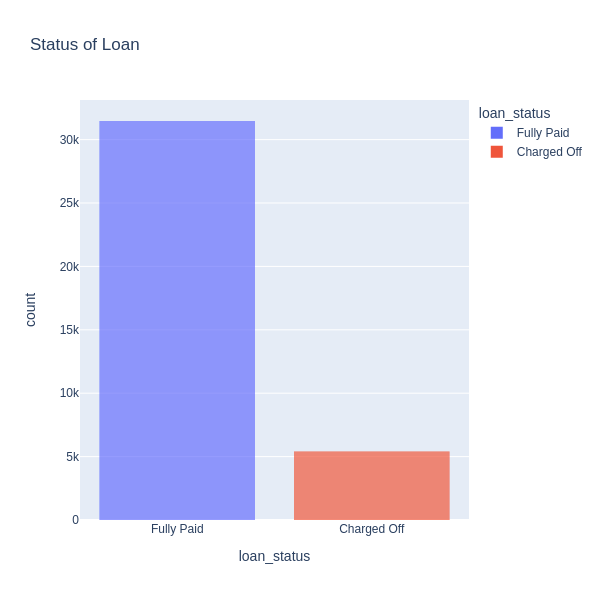

In [32]:
fig = px.bar(df, x="loan_status", color='loan_status', title="Status of Loan")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=600, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

Above graph loan_status shows class is biased by Fully Paid which is good for Lending Clud. Fully Paid has 30k+ and Charged Off has 5K+ entries

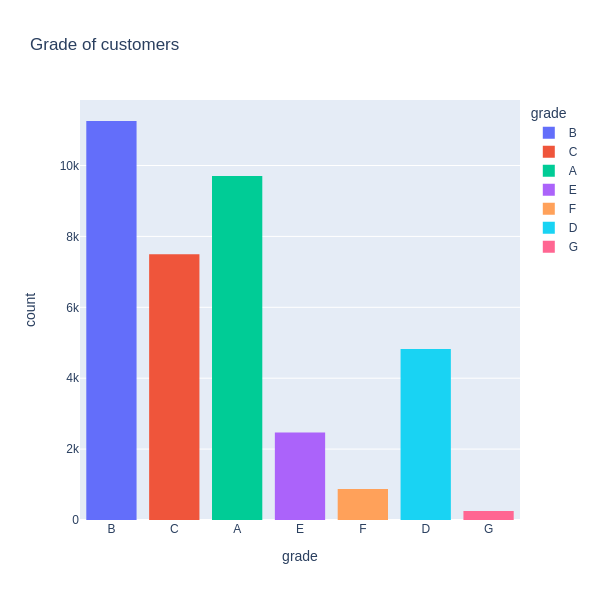

In [33]:
fig = px.histogram(df, x="grade", color="grade", title="Grade of customers")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=600, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

Above graph shows 'B' grade customers have taken Loan Compare to 'A' Grade Customers. 'G' grade customers has low count. 

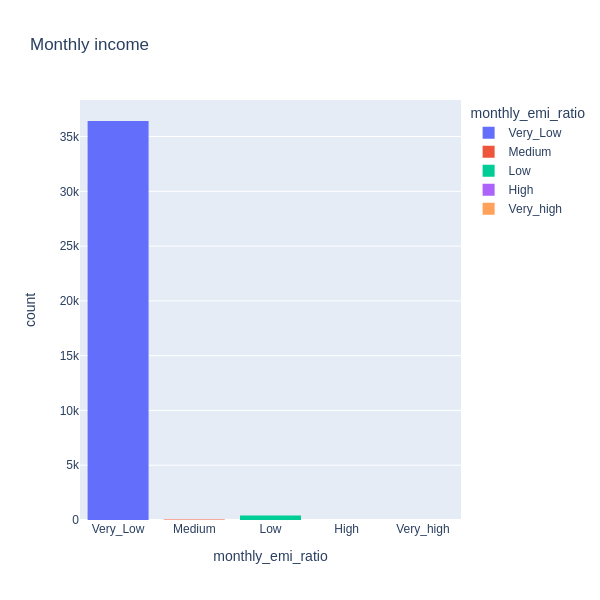

In [34]:
fig = px.histogram(df, x="monthly_emi_ratio", color="monthly_emi_ratio", title="Monthly income")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=600, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

Above graphs shows the ratio of monthly income w.r.t monthly installments. According to Very_Low most of the customers paying monthly emi less than 30% of monthly salary. About 60 customers paying emi morethan 50% of monthly salary.

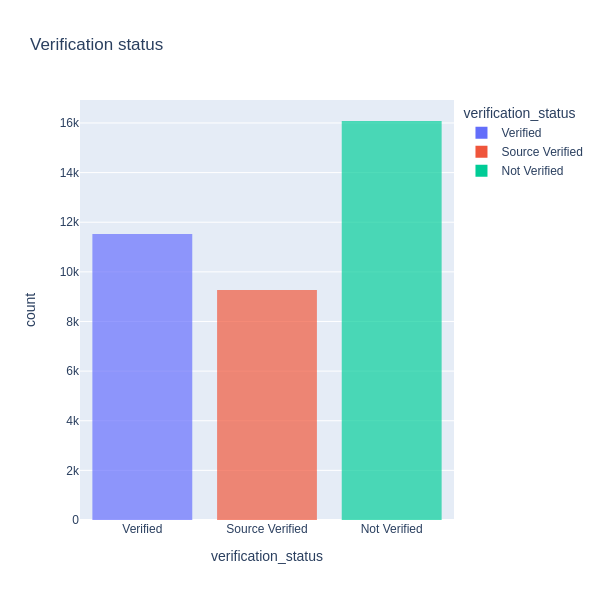

In [35]:
fig = px.bar(df, x="verification_status", color= "verification_status",  title="Verification status")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=600, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

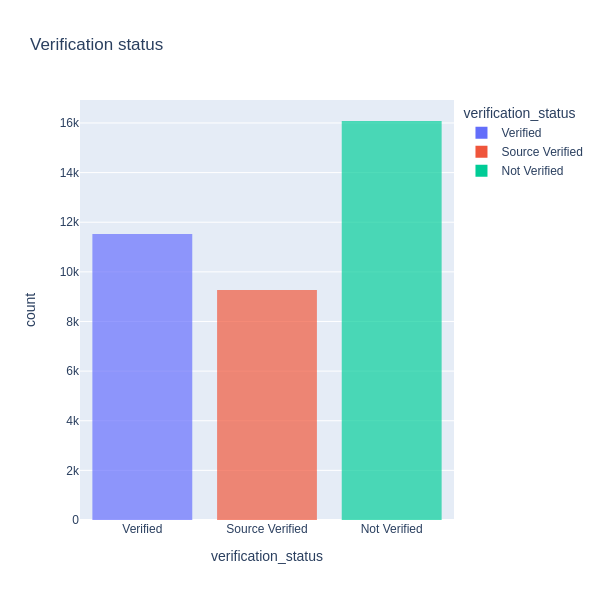

In [36]:
fig = px.bar(df, x="verification_status", color= "verification_status",  title="Verification status")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=600, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

Above graph shows that Not verified customers greater than Verified customers.

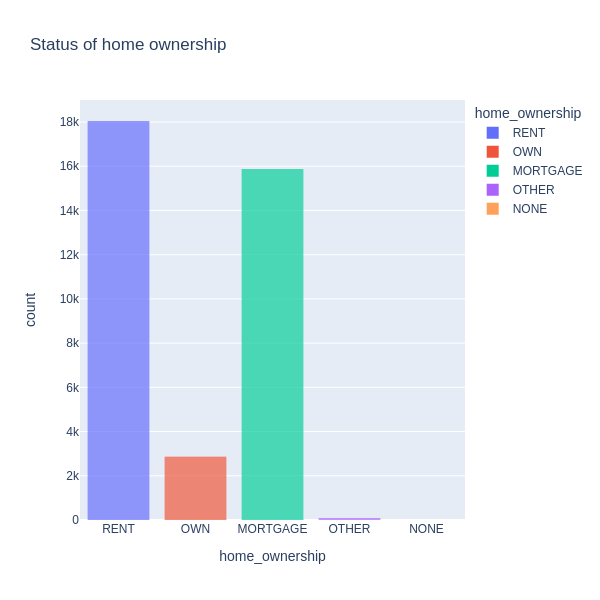

In [37]:
fig = px.bar(df, x="home_ownership", color= "home_ownership",  title="Status of home ownership")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=600, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

Above graph shows the customers who is staying on rent taken more loans compare to the customers who has own house.

* Continuous Features

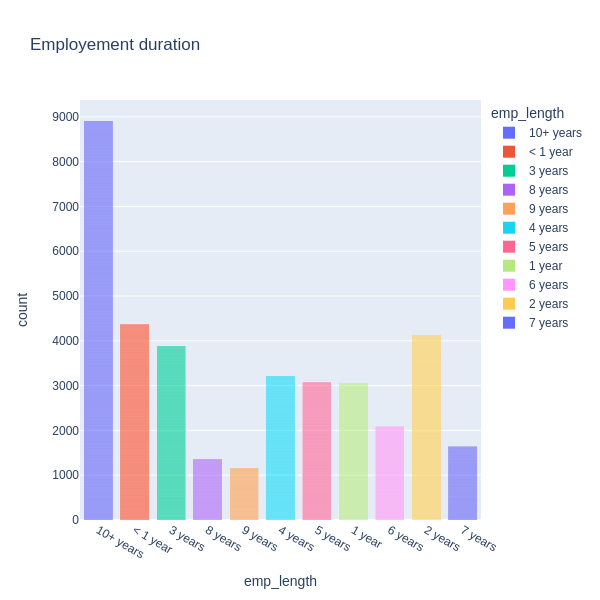

In [39]:
fig = px.bar(df, x="emp_length",color= "emp_length",  title="Employement duration")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=600, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

Above graph shows that customer having 10+ years experience and less than 2 years experience hav taken more loans compare other customers.

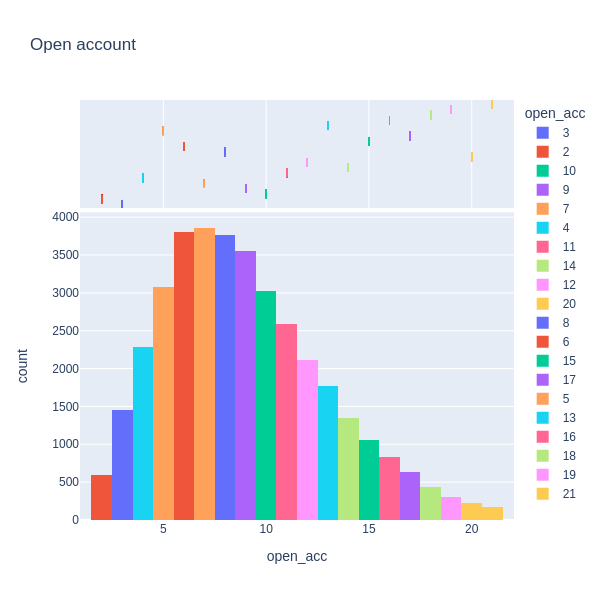

In [40]:
fig = px.histogram(df, x="open_acc", color="open_acc", title="Open account",  marginal="rug")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=600, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

Above graph shows the status of open account.

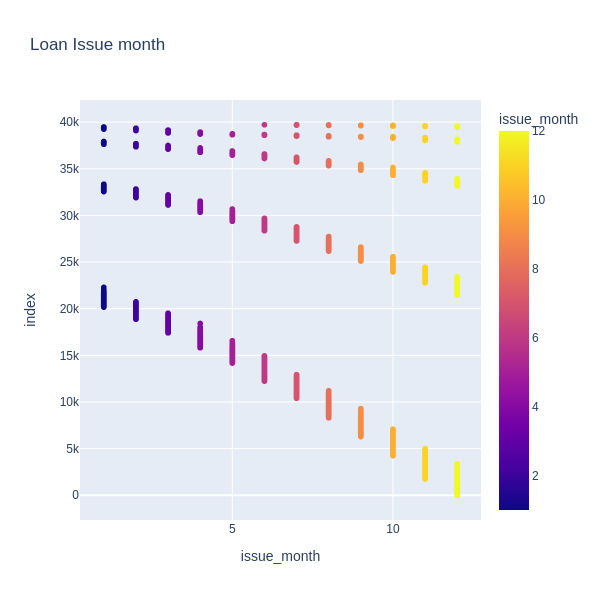

In [41]:
fig = px.scatter(df, x="issue_month", color="issue_month",  title="Loan Issue month")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=600, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

Above graph shows that count of loan taken in each month 

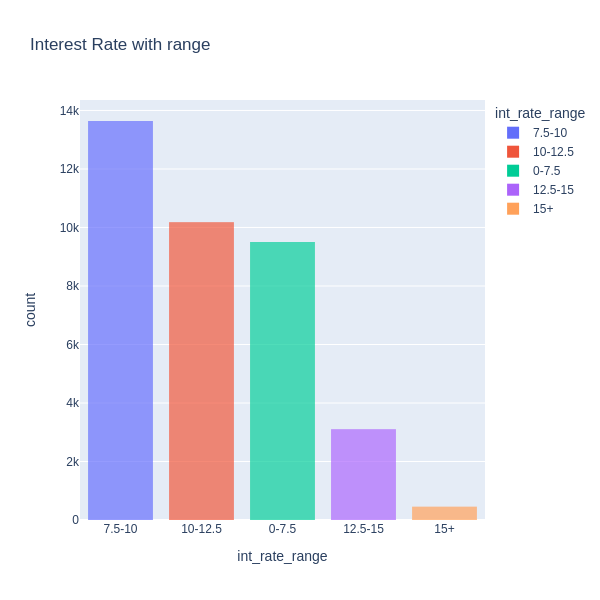

In [42]:
fig = px.bar(df, x="int_rate_range", color= "int_rate_range",  title="Interest Rate with range")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=600, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

Above graph shows most of the loan issues with interest rate 7.5% to 10%.

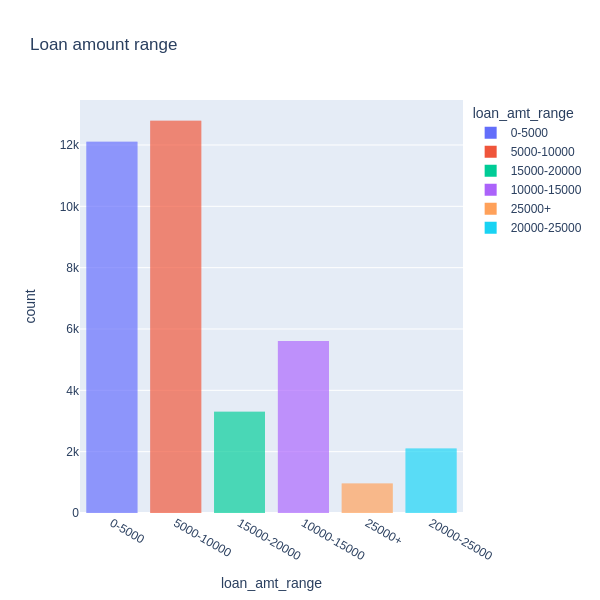

In [43]:
fig = px.bar(df, x="loan_amt_range", color= "loan_amt_range",  title="Loan amount range")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=600, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

Above graph shows most of the customers have taken loan amount less than 10000

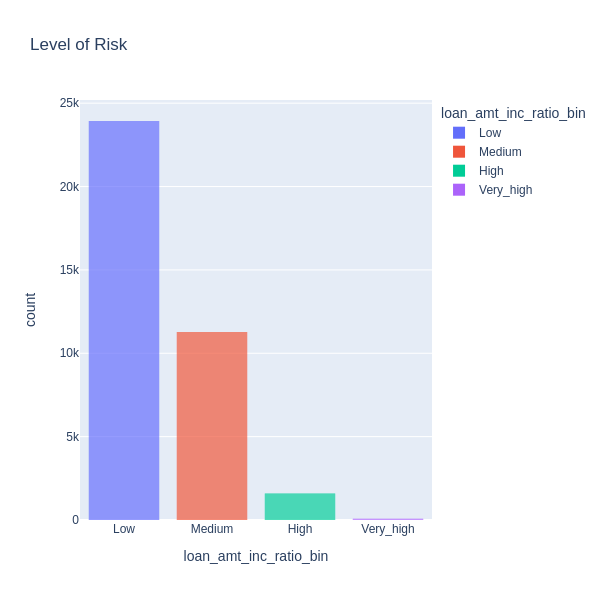

In [44]:
fig = px.bar(df, x="loan_amt_inc_ratio_bin", color="loan_amt_inc_ratio_bin", title="Level of Risk")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=600, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

Above graph shows the ratio of loan amount w.r.t annual income

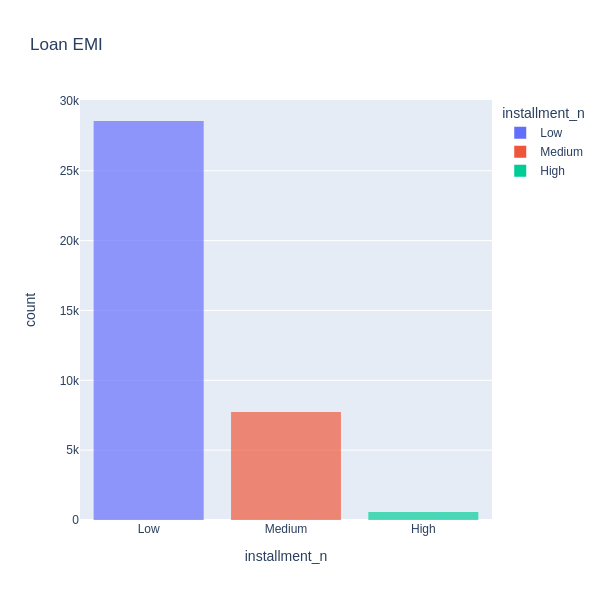

In [45]:
fig = px.bar(df, x="installment_n", color= "installment_n",  title="Loan EMI")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=600, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

Above graph shows the monthly EMI of the customers

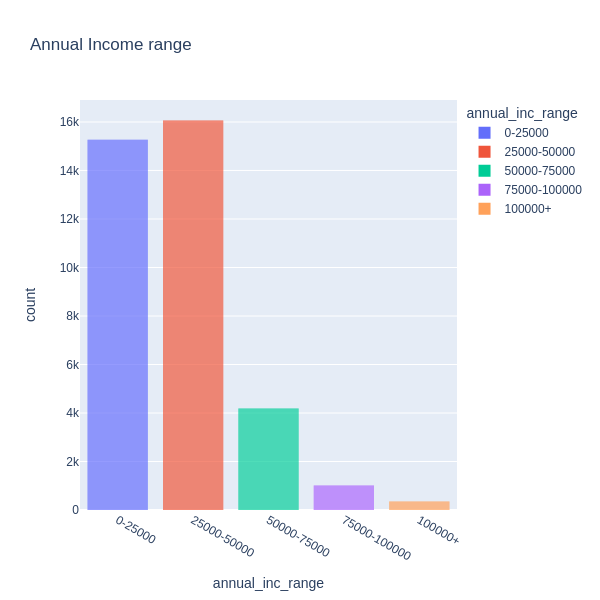

In [46]:
fig = px.bar(df, x="annual_inc_range", color= "annual_inc_range",  title="Annual Income range")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=600, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

Above graph shows the annual income range of the customers

In [47]:
def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = {'loan'}

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  


In [48]:
data = df['title']
data.reset_index(drop=True, inplace=True)
common_text = str(data)
common_mask = cv2.imread('usa.png')
plot_wordcloud(common_text, max_words=400, max_font_size=120,
               title = 'Most common words use Title', title_size=15)

Above image is ploting word cloud for title, which shows mostly used text from data. Like Consolidation is used many times so its Font size is bigger than other words.

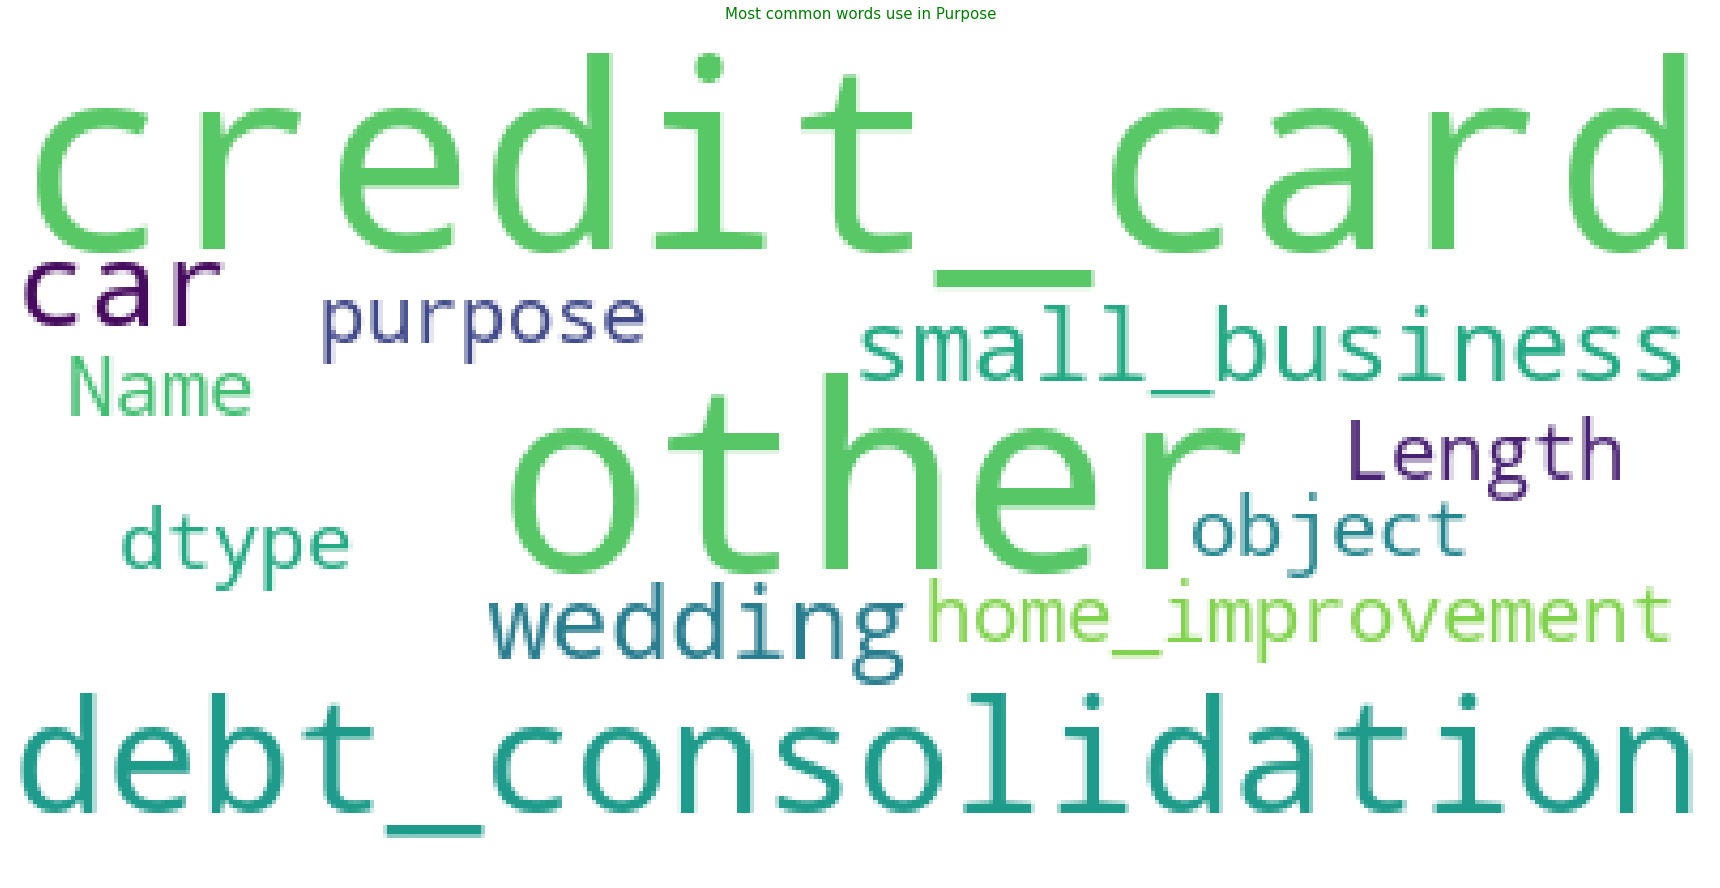

In [49]:
data = df['purpose']
data.reset_index(drop=True, inplace=True)
common_text = str(data)
common_mask = cv2.imread('usa.png')
plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120, 
               title = 'Most common words use in Purpose', title_size=15)

Above image is ploting word cloud for Purpose, which shows mostly used text from data. Like credit_card is used many times so its Font size is bigger then other words.

## 5. Segmented Univariate Analysis

* Categorical Features


In [50]:
fig = px.bar(df, x="loan_status", y="term", color="loan_status", title="Status of loan and Term")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=600, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

Above plot for ‘term’ we can infer that the defaulters rate is increasing wrt term, hence the chances of loan getting defaulted is less for 36m than 60m.

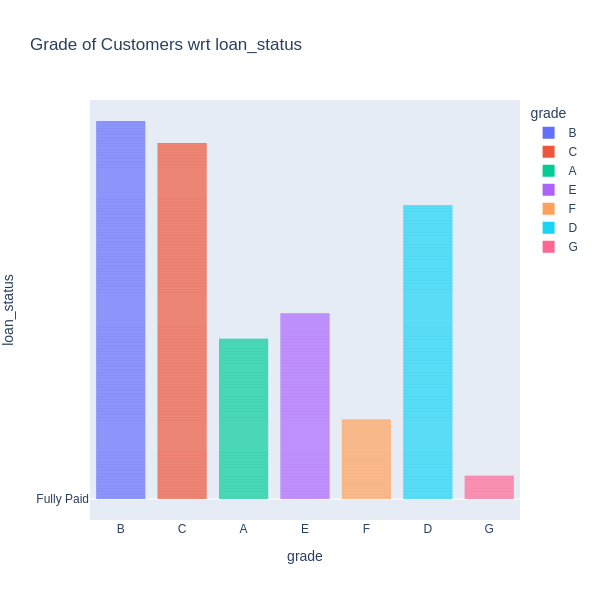

In [51]:
fig = px.bar(df, x="grade", y="loan_status", color="grade", title="Grade of Customers wrt loan_status")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=600, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

From above plot for ‘grade’ we can infer that the defaulters rate is increasing wrt grade, hence the chances of loan getting defaulted increases with the grade from A moving towards G.

In [52]:
fig = px.bar(df, x="sub_grade", y="loan_status", color= "sub_grade",  title="Sub Grade of defaulter wrt loan_status")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=600, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

From above plot for ‘sub_grade’ we can infer that the defaulters rate is increasing wrt sub_grade, hence the chances of loan getting defaulted increases with the sub_grade from A1 moving towards G5.

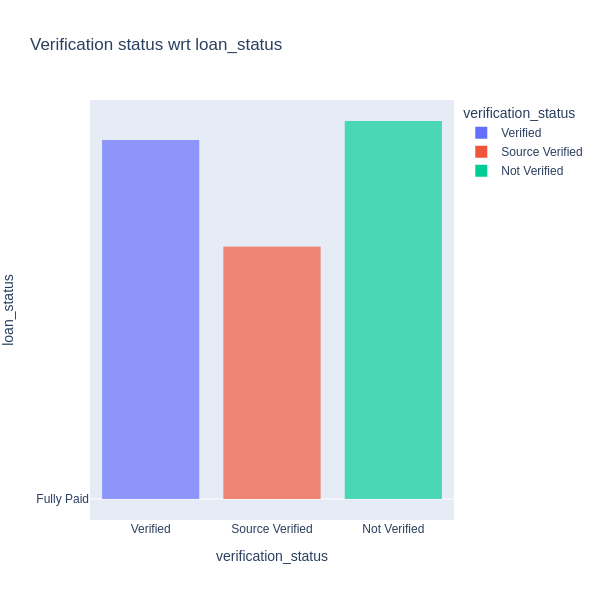

In [53]:
fig = px.bar(df, x="verification_status", y="loan_status", color= "verification_status",  title="Verification status wrt loan_status")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=600, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

From above plot for ‘verification_status’ we can infer that the defaulters rate is increasing and is less for Not Verified users than Verified ones, but not useful for analysis.


In [54]:
fig = px.bar(df, x="home_ownership", y="loan_status", color= "home_ownership",  title="Status of home ownership")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=600, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

From above plot for ‘home_ownership’ we can infer that the defaulters rate is constant here (it is quite more for OTHERS but we dont know what is in there, so we’ll not consider it for analysis), hence defaulter does not depends on home_ownership

In [55]:
fig = px.bar(df, x="purpose", y="loan_status", color= "purpose",  title="Purpose of taking loan wrt loan_status")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=600, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

From above plot for ‘purpose’ we can infer that the defaulters rate is nearly constant for all purpose type except ‘small business’, hence rate will depend on purpose of the loan

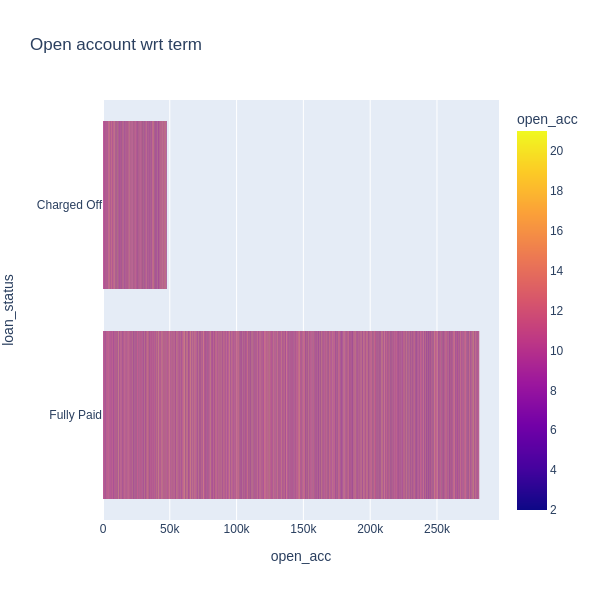

In [56]:
fig = px.bar(df, x="open_acc", y="loan_status", color= "open_acc",  title="Open account wrt term")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=600, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

From above plot for ‘open_acc’ we can infer that the defaulters rate is nearly constant for feature open_acc, hence rate will not depend on open_acc feature

* Continuous Features

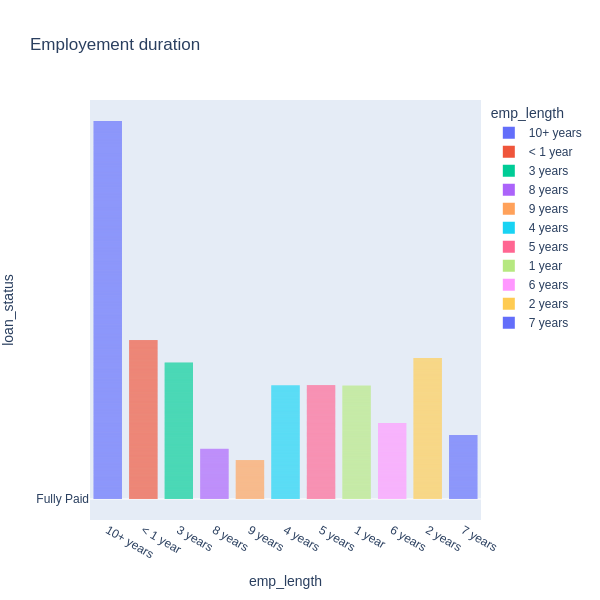

In [57]:
fig = px.bar(df, x="emp_length", y="loan_status", color= "emp_length",  title="Employement duration")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=600, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

From above plot for ‘emp_length’ we can infer that the defaulters rate is constant here, hence defaulter does not depends on emp_length

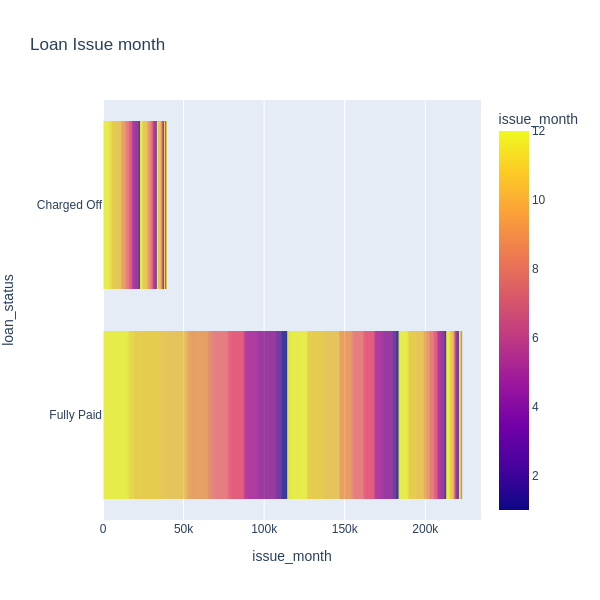

In [58]:
fig = px.bar(df, x="issue_month", y="loan_status", color="issue_month",  title="Loan Issue month")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=600, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

From above plot for ‘month’ we can infer that the defaulters rate is nearly constant here, not useful

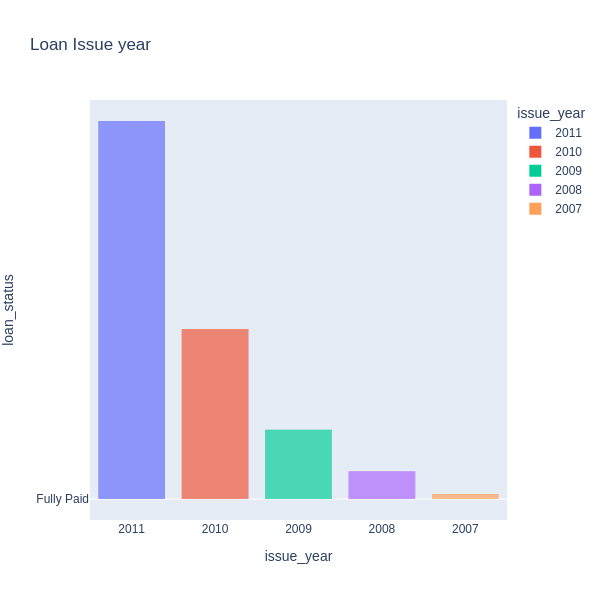

In [59]:
fig = px.bar(df, x="issue_year", y="loan_status", color= "issue_year",  title="Loan Issue year")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=600, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

From above plot for ‘year’ we can infer that the defaulters rate is nearly constant here, not useful

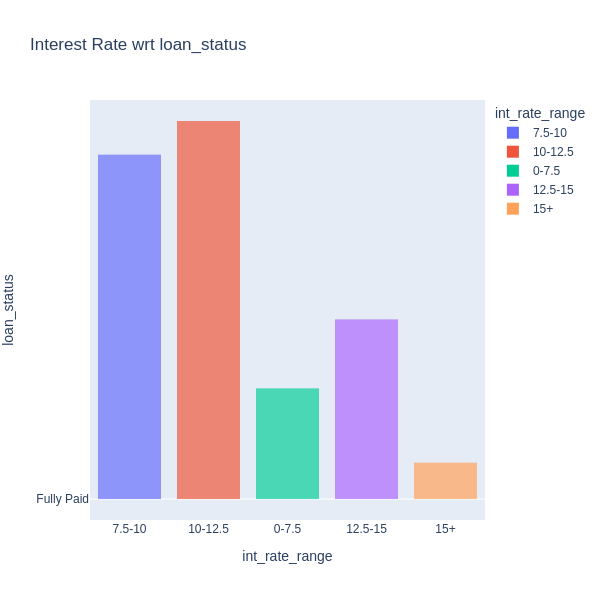

In [60]:
fig = px.bar(df, x="int_rate_range", y="loan_status", color= "int_rate_range",  title="Interest Rate wrt loan_status")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=600, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

From above plot for ‘int_rate_range’ we can infer that the defaulters rate is decreasing with int_rate_range values, hence rate will depend on int_rate_range feature


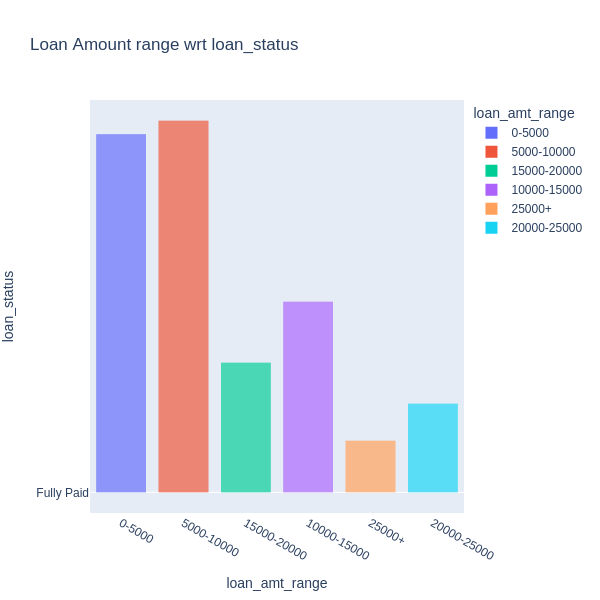

In [61]:
fig = px.bar(df, x="loan_amt_range", y="loan_status", color= "loan_amt_range",  title="Loan Amount range wrt loan_status")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=600, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

From above plot for ‘loan_amnt_range’ we can infer that the defaulters rate is increasing loan_amnt_range values, hence rate will depend on loan_amnt_range feature

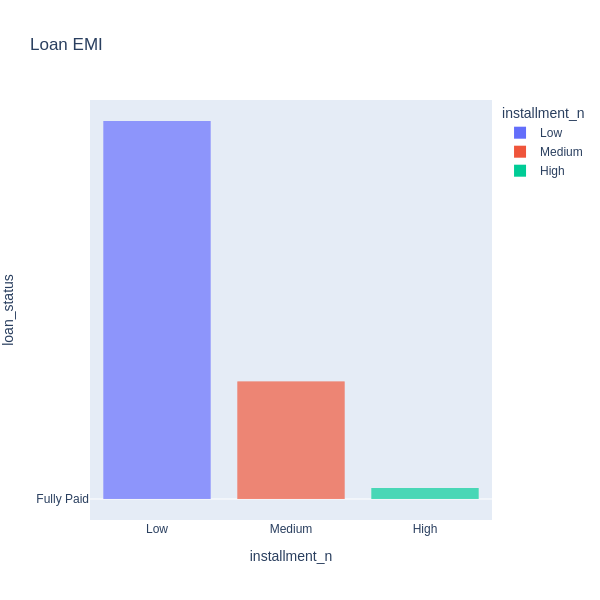

In [62]:
fig = px.bar(df, x="installment_n", y="loan_status", color= "installment_n",  title="Loan EMI")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=600, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

From above plot for ‘installment’ we can infer that the defaulters rate is increasing as with installment values, hence rate will depend on dti_range feature

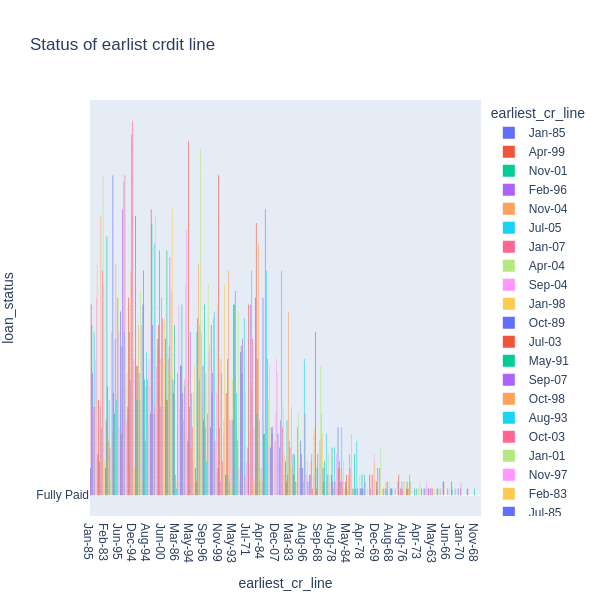

In [63]:
fig = px.bar(df, x="earliest_cr_line", y="loan_status", color= "earliest_cr_line",  title="Status of earlist crdit line")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=600, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

From above plot for ‘earliest_cr_line’ we can infer that the defaulters rate is nearly constant for all purpose type except year around 65, hence rate does not depends on earliest_cr_line of the person

In [64]:
fig = px.bar(df, x="annual_inc_range", y="loan_status", color= "annual_inc_range",  title="Annual Income range wrt loan_status")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=600, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

From above plot for ‘annual_inc_range’ we can infer that the defaulters rate is decreasing as with annual_inc_range values, hence rate will depend on annual_inc_range feature

## 6. Bivariate Analysis

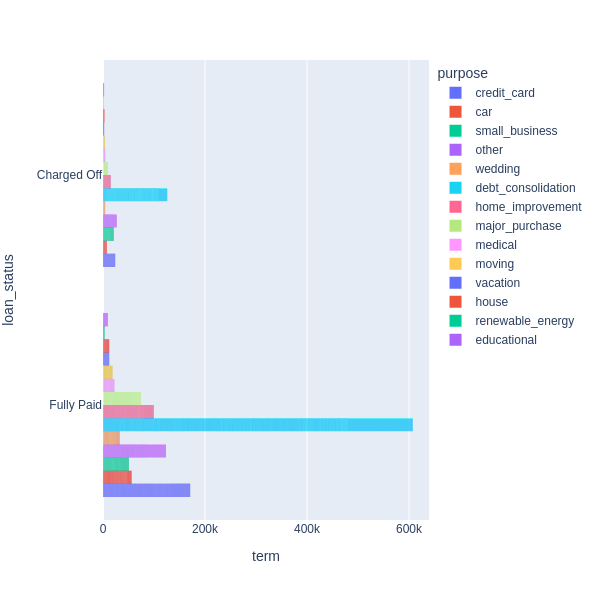

In [65]:
fig = px.bar(df, x="term", y="loan_status", color="purpose",
             barmode="group")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=600, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

As we can see straight lines on the plot, default ratio increases for every purpose wrt term

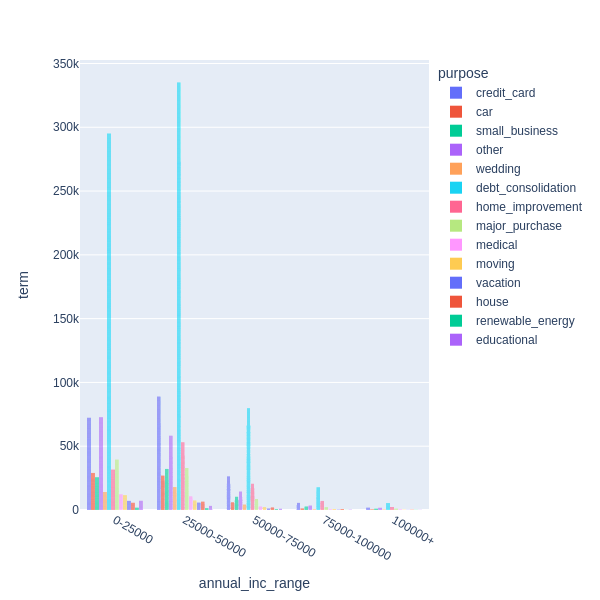

In [66]:
fig = px.bar(df, x="annual_inc_range", y="term", color="purpose",
             barmode="group")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=600, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

From above plot, we can infer it doesn’t show any correlation

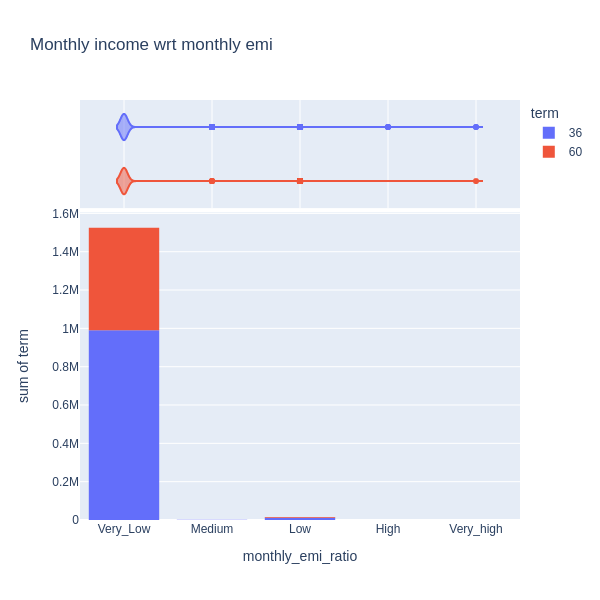

In [67]:
fig = px.histogram(df, x="monthly_emi_ratio", y ='term', color='term', title="Monthly income wrt monthly emi",  marginal="violin")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=600, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

From above plot for `monthly_emi_ratio` we can infer that the defaulters rate is increasing wrt `term`.


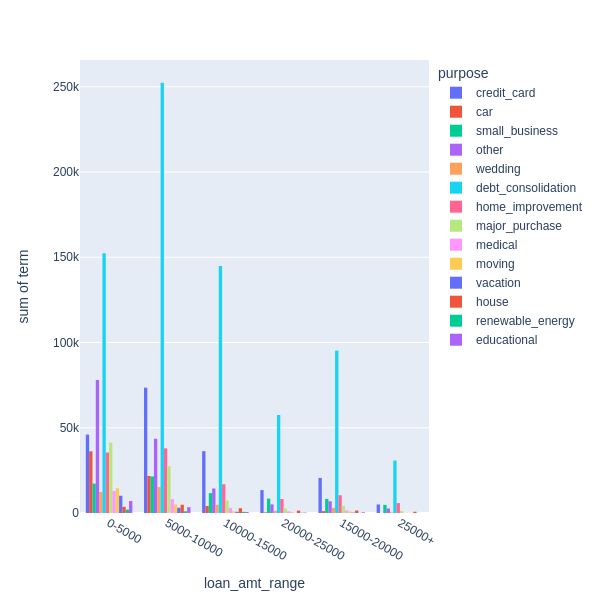

In [68]:
fig = px.histogram(df, x="loan_amt_range", y="term", color="purpose",
             barmode="group")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=600, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

As we can see straight lines on the plot, default ratio increases for every purpose wrt loan_amnt_range


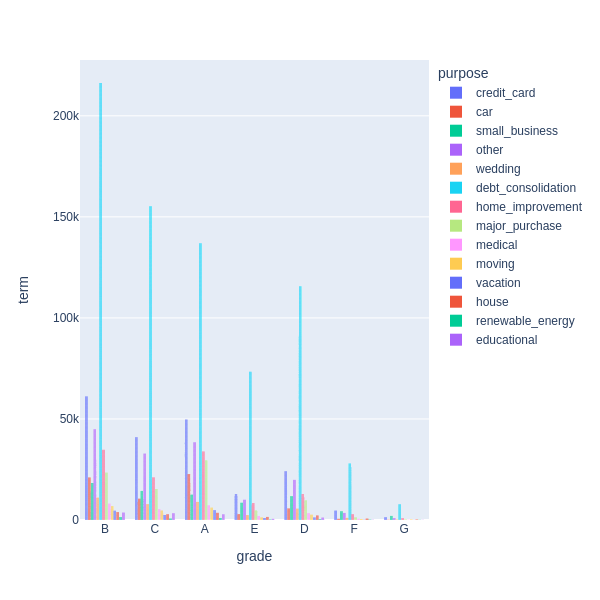

In [69]:
fig = px.bar(df, x="grade", y="term", color="purpose",
             barmode="group")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=600, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

As we can see straight lines on the plot, default ratio increases for every purpose wrt grade

In [70]:
fig = px.bar(df, x="loan_amt_range", y="term", color="purpose",
             barmode="group")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=600, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

As we can see straight lines on the plot, default ratio increases for every term wrt loan_amnt_range

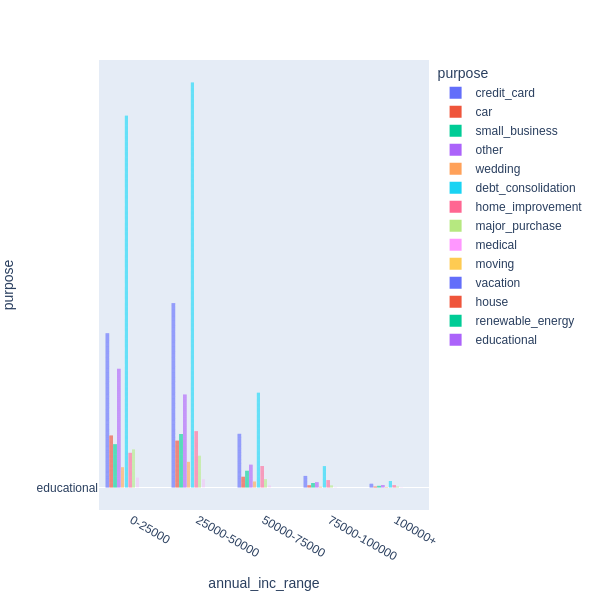

In [71]:
fig = px.bar(df, x="annual_inc_range", y="purpose", color="purpose",
             barmode="group")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=600, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

As we can see straight lines on the plot, default ratio increases for every purpose wrt annual_inc_range

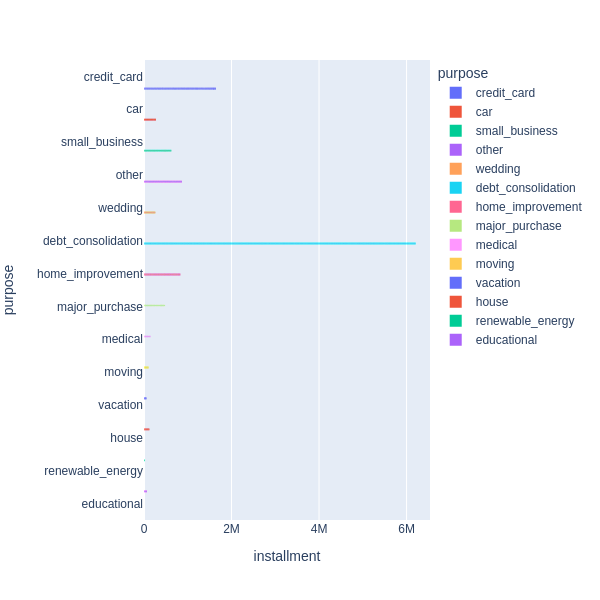

In [72]:
fig = px.bar(df, x="installment", y="purpose", color="purpose",
             barmode="group")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=600, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

As we can see straight lines on the plot, default ratio increases for every purpose wrt installment except for small_business

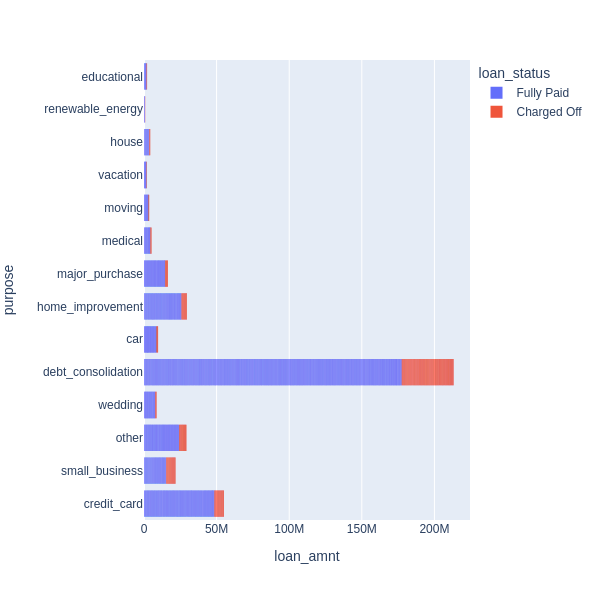

In [73]:
fig = px.bar(df, x = "loan_amnt", y = "purpose", color="loan_status")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=600, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

As we can see straight lines on the plot, default ratio increases for every purpose wrt loan_amnt

#### Interactive Frame visuallization

In [81]:
fig = px.scatter(df, x="annual_inc", y="funded_amnt", animation_frame="issue_month",
          color="loan_status")
fig.show()

Above graph shows the scatter plot for ratio of Fully Paid and Charged off customers

## 7. Multivariate Analysis

* Visualizing the data corrleation matrics with Heatmap plot

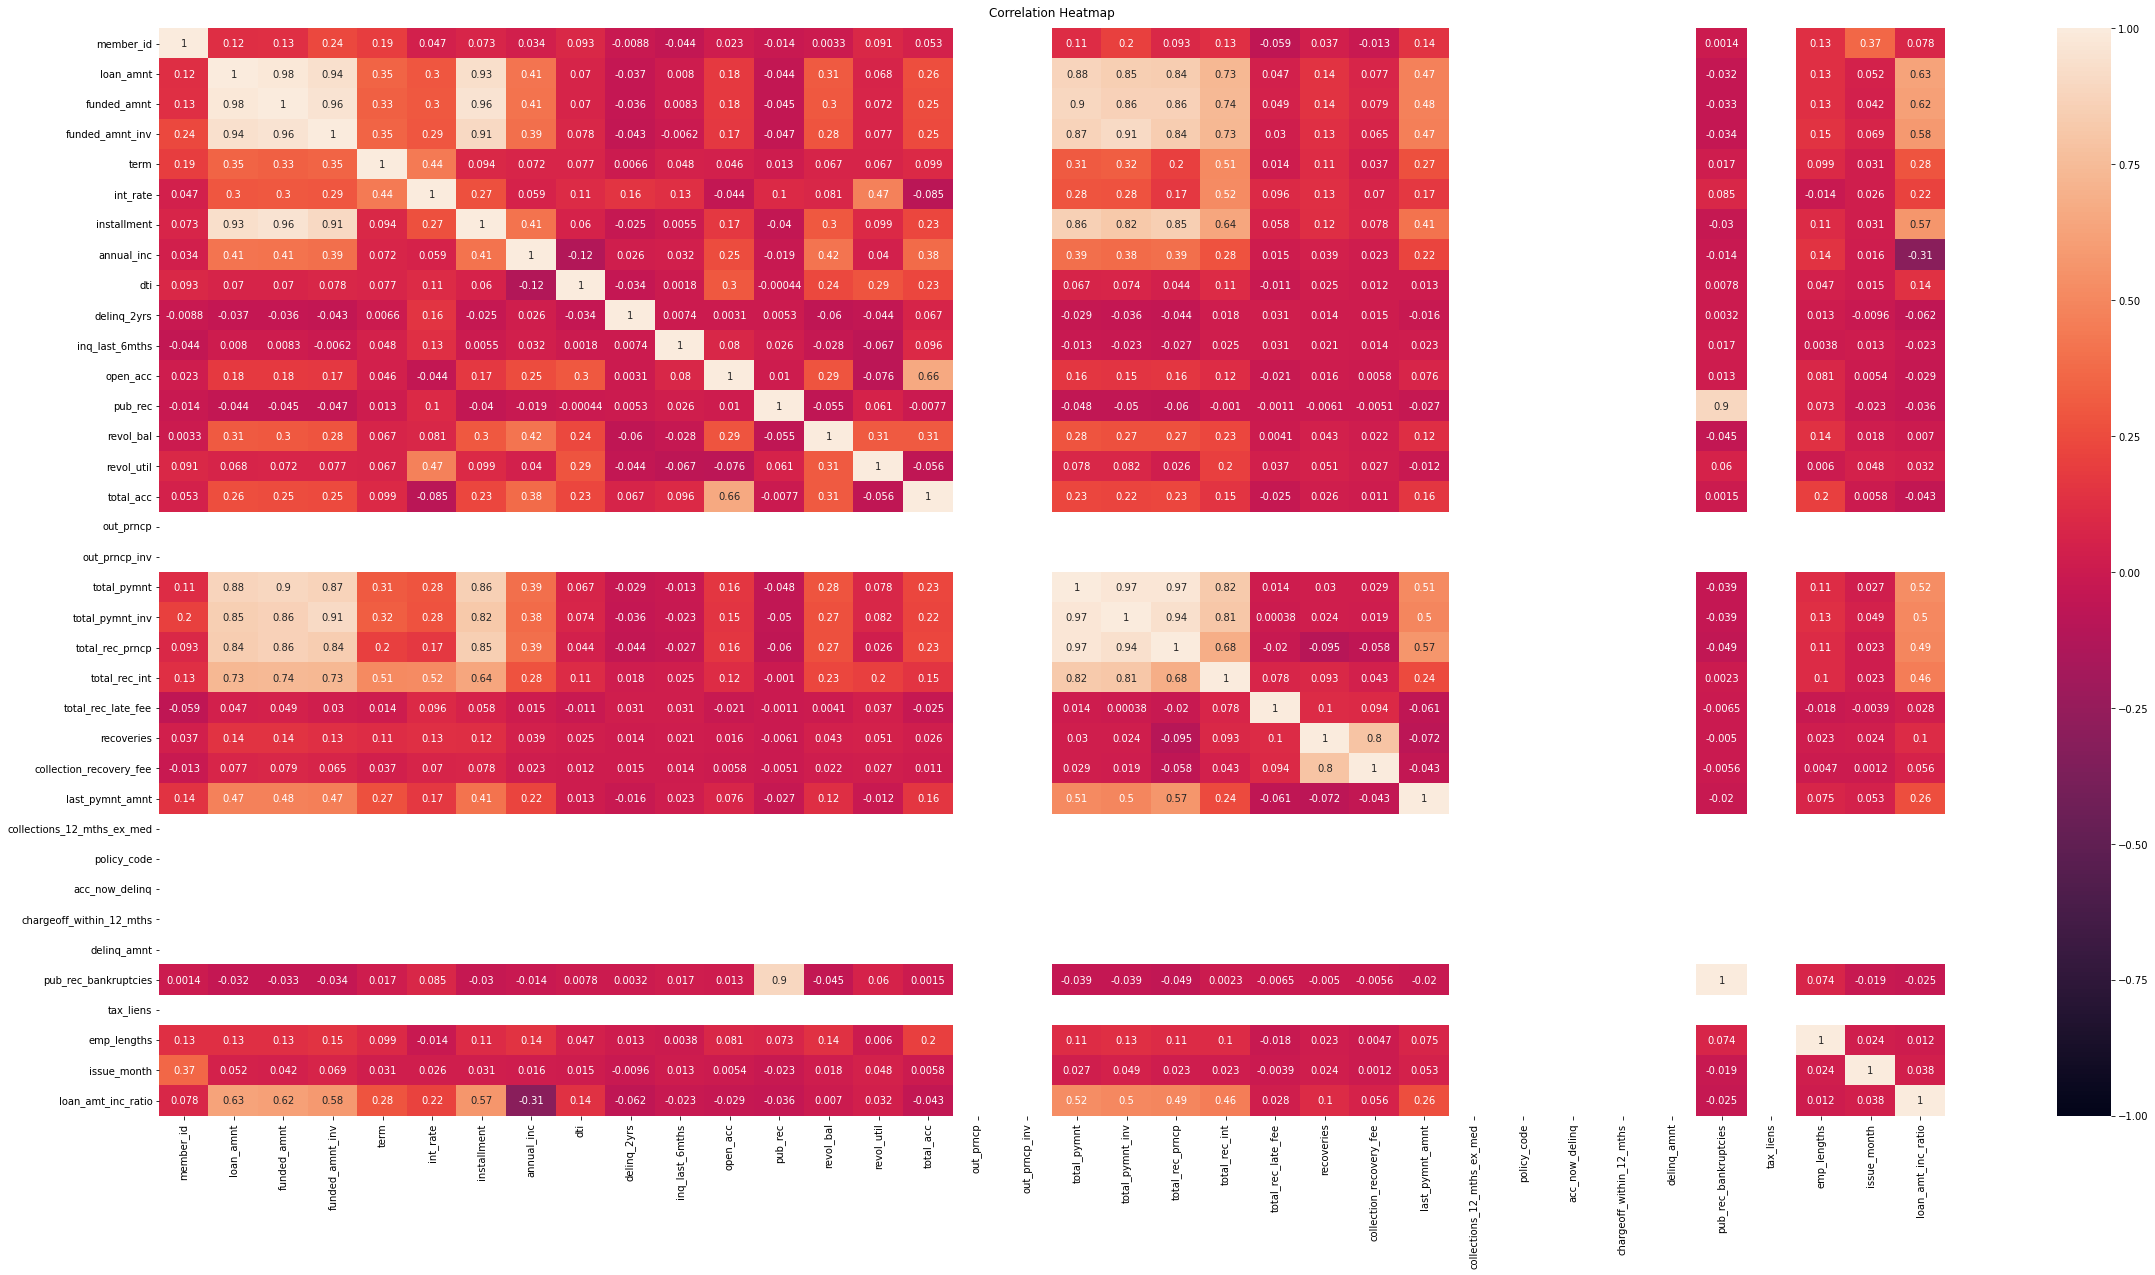

In [75]:
plt.figure(figsize=(40, 20))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

* Remove irrelevant columns to imporve correlation matrics

In [76]:
df.drop(columns=['collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
                 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens',
                 'out_prncp', 'out_prncp_inv'], inplace=True)

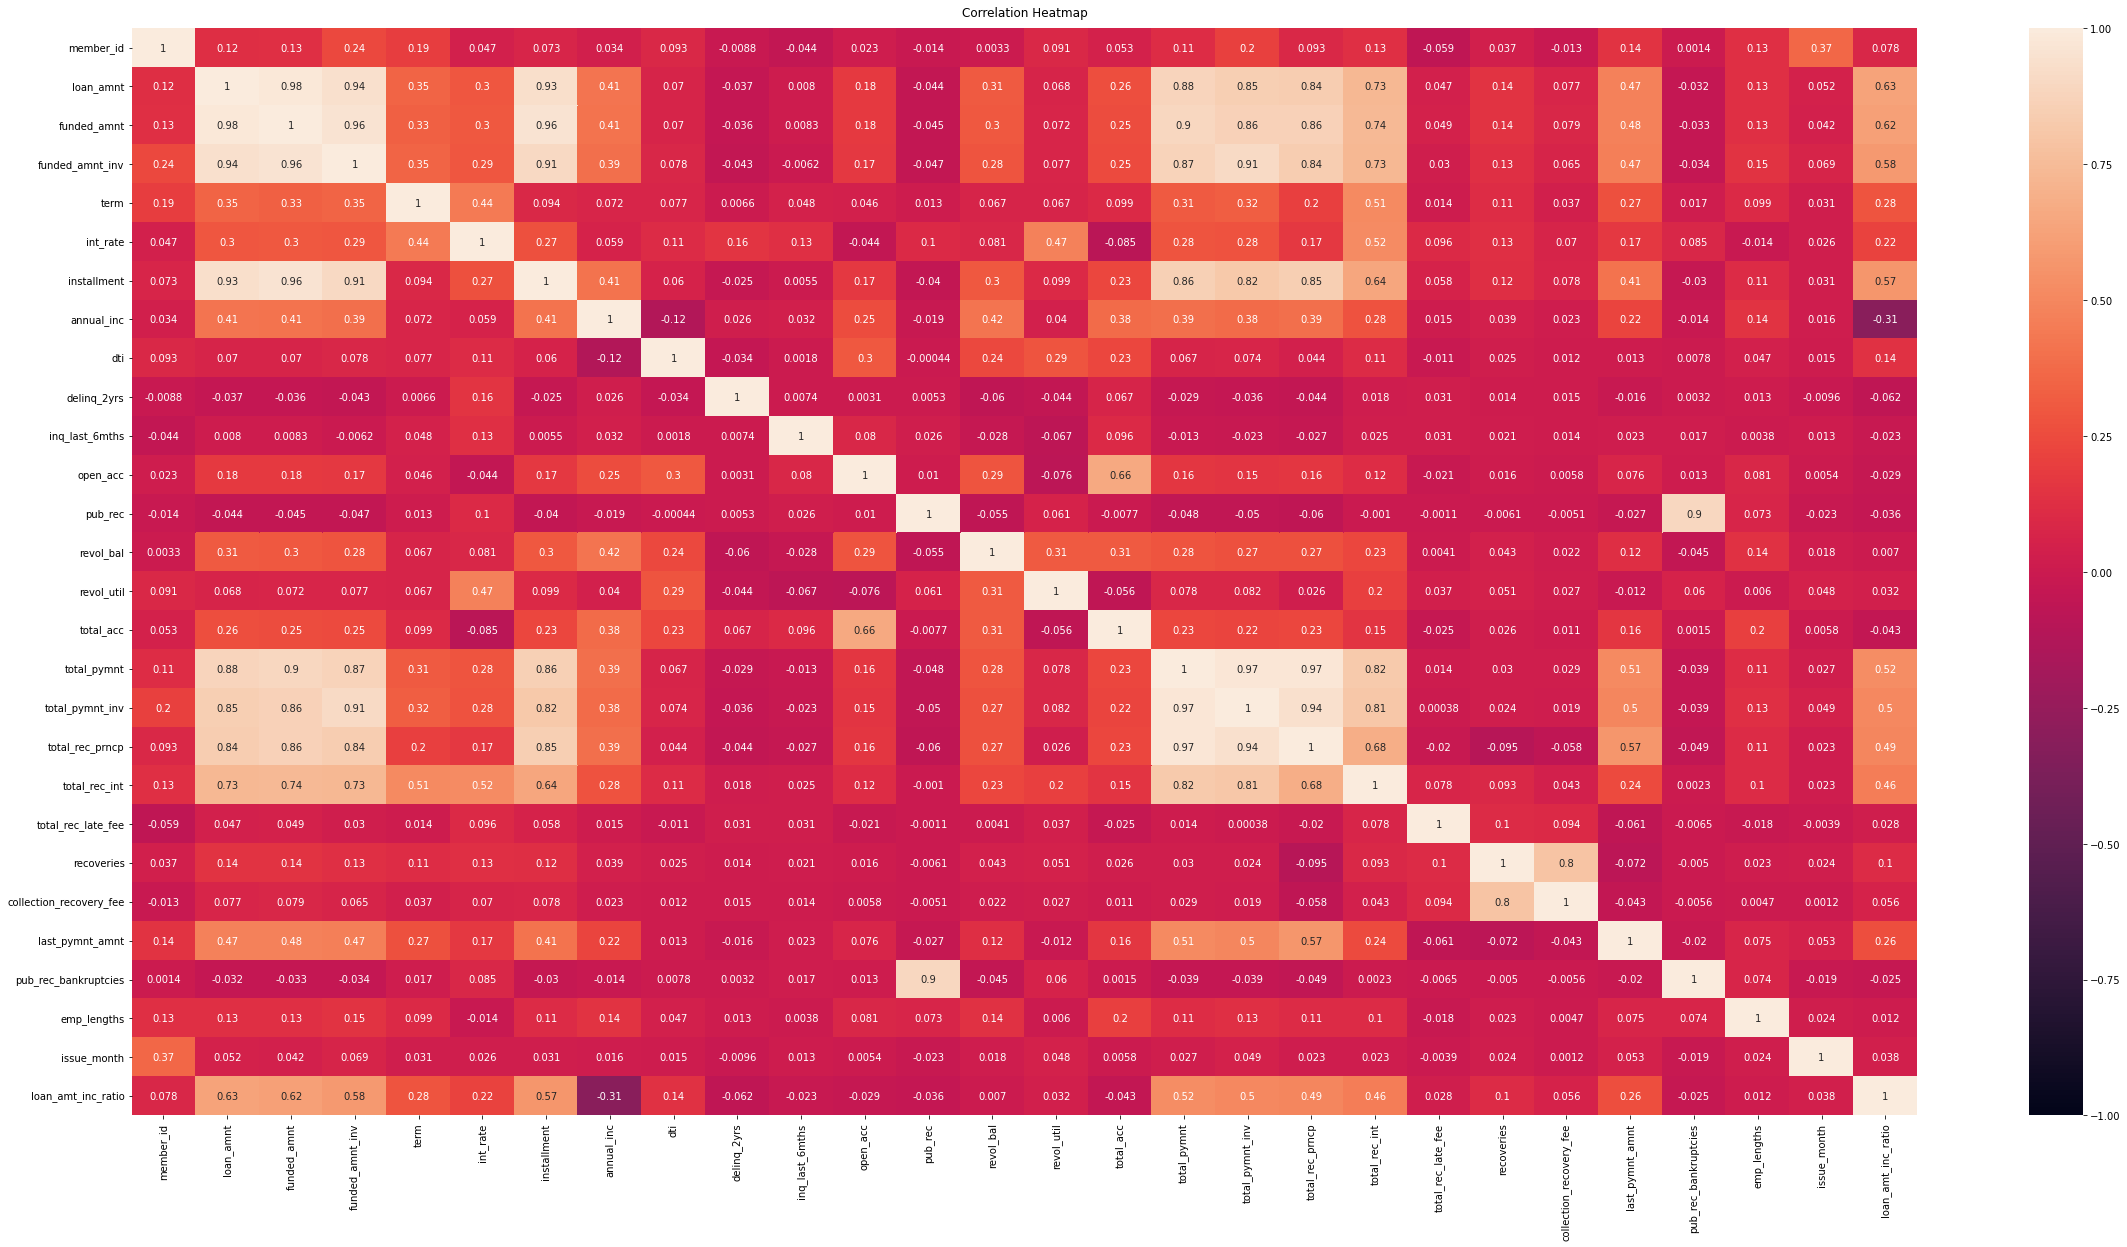

In [77]:
plt.figure(figsize=(40, 20))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [78]:
df.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'desc', 'purpose', 'title',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'application_type', 'pub_rec_bankruptcies',
       'emp_lengths', 'issue_month', 'issue_year', 'monthly_emi_ratio',
       'loan_amt_inc_ratio', 'loan_amt_inc_ratio_bin', 'installment_n',
       'loan_amt_range', 'int_rate_range', 'annual_inc_range'],
      dtype='object')

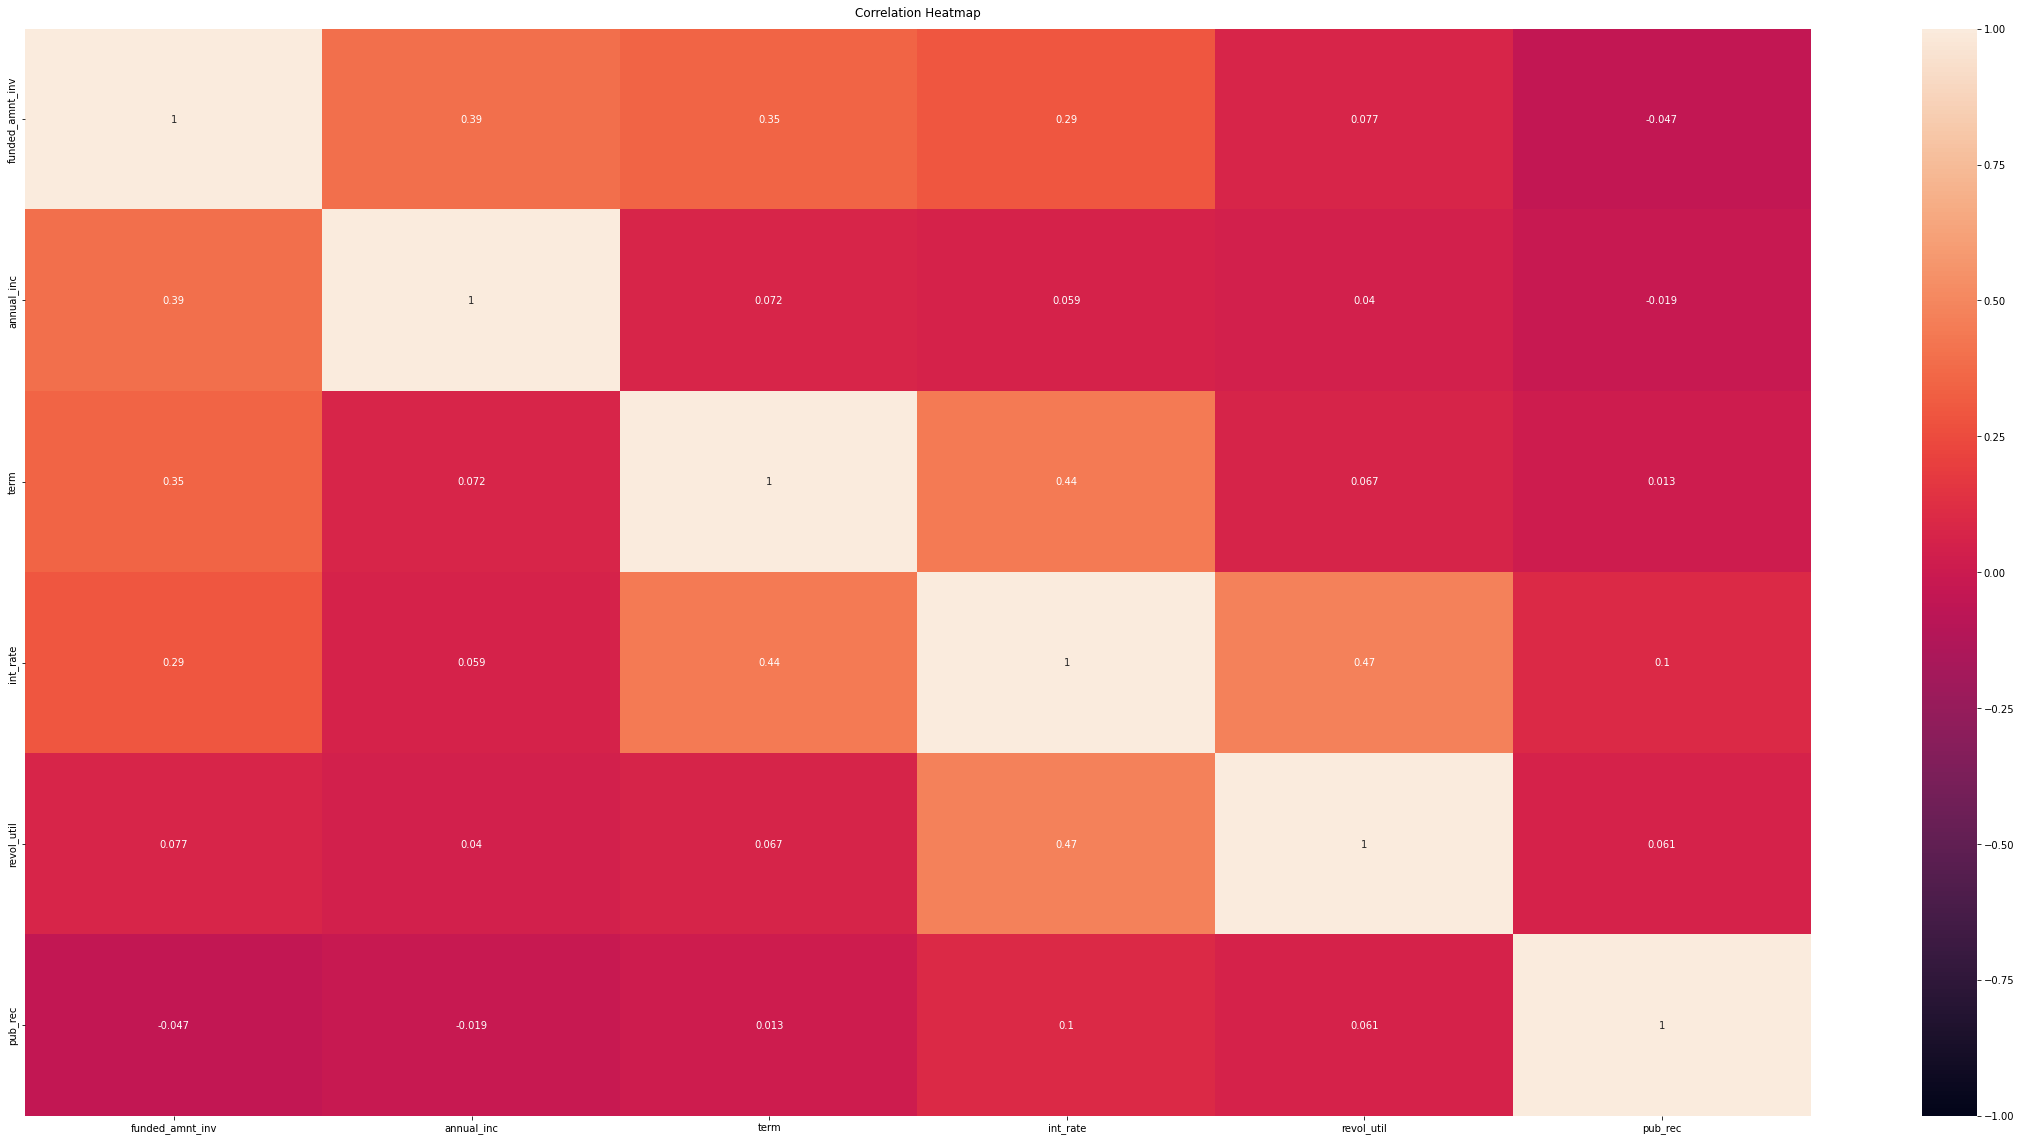

In [79]:
continuous_features = ["funded_amnt_inv", "annual_inc", "term", "int_rate", "loan_status", "revol_util", "pub_rec", "earliest_cr_line"]
df_corr = df[continuous_features].corr()
plt.figure(figsize=(40, 20))
heatmap = sns.heatmap(df_corr, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Above graph shows correclation matrics 